In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from algorithms.neural_network import Perceptron

%matplotlib inline

### OR logic function

In [2]:
# OR logic function
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[1]])

perc = Perceptron(num_neurons=1) # just one output
perc.fit(X, y)

print "weights:\n" , perc.weights
print "activations:\n", perc.is_activated
print "custom prediction:\n", perc.predict(np.array([[0.8, 0.8]]))

iteration #: 0
iteration #: 1
iteration #: 2
iteration #: 3
iteration #: 4
iteration #: 5
early stopping - all predictions are correct
weights:
[[ 0.56030653]
 [ 0.55445446]
 [-0.22883534]]
activations:
[[0]
 [1]
 [1]
 [1]]
custom prediction:
[[1]]


### XOR logic function

In [3]:
# XOR logic function
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

perc = Perceptron(num_neurons=1) # just one output
perc.fit(X, y)

print "weights:\n" , perc.weights
print "activations:\n", perc.is_activated

iteration #: 0
iteration #: 1
iteration #: 2
iteration #: 3
iteration #: 4
iteration #: 5
iteration #: 6
iteration #: 7
iteration #: 8
iteration #: 9
weights:
[[ 0.02738622]
 [ 0.05936701]
 [ 0.0235676 ]]
activations:
[[0]
 [0]
 [0]
 [0]]


Artificial solution - adding extra 3rd dimension (x1*x2)

In [4]:
X = np.array([[0,0,0],[0,1,0],[1,0,0],[1,1,1]])
y = np.array([[0],[1],[1],[0]])

perc = Perceptron(num_neurons=1) # just one output
perc.fit(X, y, num_iter=20)

print "weights:\n" , perc.weights
print "activations:\n", perc.is_activated

iteration #: 0
iteration #: 1
iteration #: 2
iteration #: 3
iteration #: 4
iteration #: 5
iteration #: 6
iteration #: 7
iteration #: 8
iteration #: 9
iteration #: 10
iteration #: 11
iteration #: 12
early stopping - all predictions are correct
weights:
[[ 0.25223283]
 [ 0.31132964]
 [-0.93286632]
 [-0.15573907]]
activations:
[[0]
 [1]
 [1]
 [0]]


### Classification problem (UCI Pima dataset)

In [52]:
# UCI ML Repository (Pima dataset)

if not os.path.isdir("./data"):
    os.mkdir("./data")
    
if not os.path.isfile("data/uci_pima.txt"):
    # downloading data    
    !wget -O data/uci_pima.txt "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
else:    
    # reading file with numpy
    data = np.loadtxt("data/uci_pima.txt", delimiter=",")

    print "Size of data: {}".format(data.shape)

Size of data: (768, 9)


Visualize classes for the first 2 features

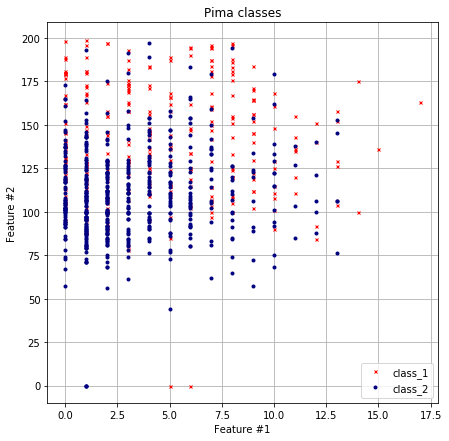

In [64]:
ind_pos = np.where(data[:,-1]==1, True, False)

plt.figure(figsize=(7,7))
plt.plot(data[ind_pos,0], data[ind_pos,1], "x", markersize=3, label="class_1", color="red");
plt.plot(data[~ind_pos,0], data[~ind_pos,1], "o", markersize=3, label="class_2", color="navy");
plt.xlabel("Feature #1");
plt.ylabel("Feature #2");
plt.title("Pima classes");
plt.legend(loc="lower right");
plt.grid();

Simple split into train/test set

In [66]:
X_train = data[::2, :-1]
y_train = data[::2, -1]
X_test = data[1::2, :-1]
y_test = data[1::2, -1]

perc = Perceptron(num_neurons=1)
perc.fit(X_train, y_train, num_iter=10)
test_acc = perc.test_accuracy(X_test, y_test)

print "test accuracy: %.2f"%test_acc

iteration #: 0
iteration #: 1
iteration #: 2
iteration #: 3
iteration #: 4
iteration #: 5
iteration #: 6
iteration #: 7
iteration #: 8
iteration #: 9
test accuracy: 0.65
